In [1]:
from src.functions import *

In [2]:
plt.rcParams.update(
    {
        "xtick.direction": "in",
        "ytick.direction": "out",
        "ytick.right": False,
        "xtick.top": False,
        "ytick.left": True,
        "xtick.bottom": False,
        "figure.facecolor": "1",
        "savefig.facecolor": "1",
        "savefig.dpi": 600,
        "figure.dpi": 600,
        "savefig.bbox": "tight",
        "font.size": 7,
        "font.family": "serif",
        "lines.markersize": 4,
        "lines.linewidth": 1,
        'axes.axisbelow' : True
    }
)

In [3]:
grid_searches = {}
delta_quantum_arrays = {}

for n in range(4,10):
    grid_searches[n] = load_from_json(f'data/grid_search_n{n}.json')
    delta_quantum_arrays[n] = np.mean(grid_searches[n]['delta'], axis=2)

gamma_range = grid_searches[4]['gamma_range']
time_range = grid_searches[4]['time_range']
T = grid_searches[4]['T']
num_random_models = grid_searches[4]['num_random_models']

In [11]:
time_range[20]

12.76595744680851

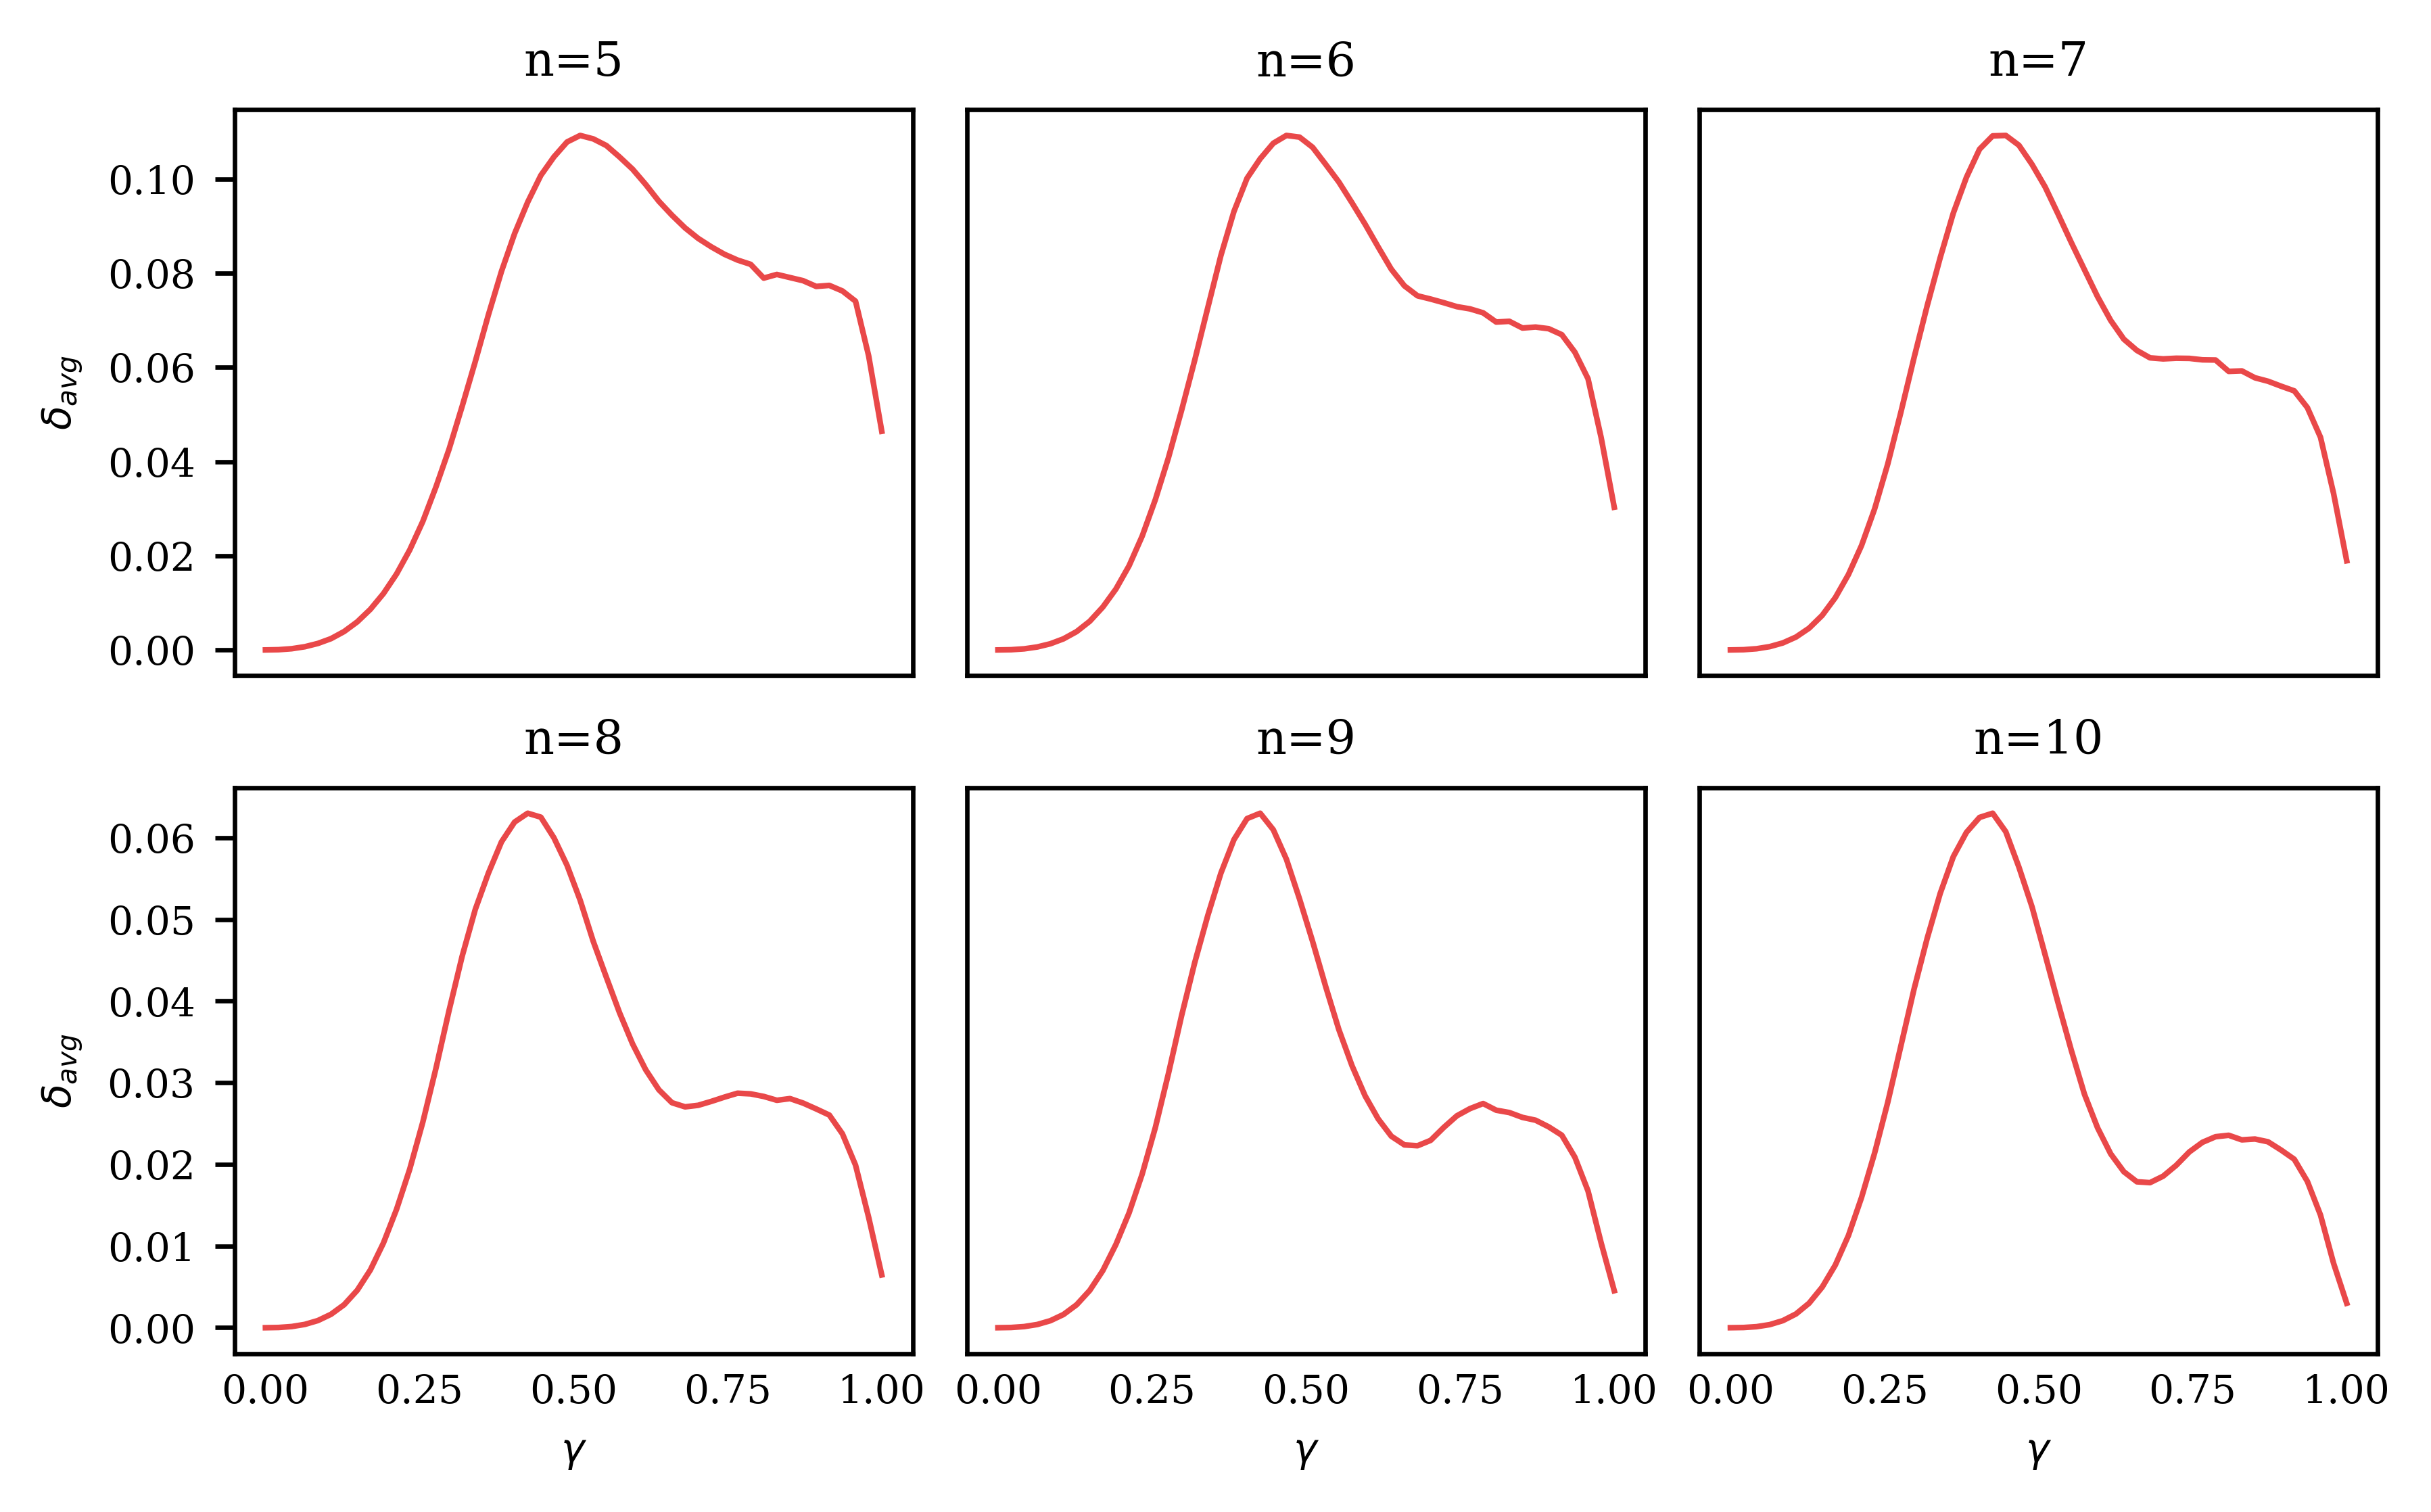

In [4]:
# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(figure_size_x, figure_size_y))

# Plot data on each subplot

pc00 = axs[0, 0].plot(gamma_range, 
                      np.mean(delta_quantum_arrays[4][:, 5:50], axis=1),
                      '-',
                      color=colors["red"],
                      alpha=0.8)
pc01 = axs[0, 1].plot(gamma_range, 
                      np.mean(delta_quantum_arrays[5][:, 5:50], axis=1),
                      '-',
                      color=colors["red"],
                      alpha=0.8)
pc02 = axs[0, 2].plot(gamma_range, 
                      np.mean(delta_quantum_arrays[6][:, 5:50], axis=1),
                      '-',
                      color=colors["red"],
                      alpha=0.8)
pc10 = axs[1, 0].plot(gamma_range, 
                      np.mean(delta_quantum_arrays[7][:, 5:50], axis=1),
                      '-',
                      color=colors["red"],
                      alpha=0.8)
pc11 = axs[1, 1].plot(gamma_range, 
                      np.mean(delta_quantum_arrays[8][:, 5:50], axis=1),
                      '-',
                      color=colors["red"],
                      alpha=0.8)
pc12 = axs[1, 2].plot(gamma_range, 
                      np.mean(delta_quantum_arrays[9][:, 5:50], axis=1),
                      '-',
                      color=colors["red"],
                      alpha=0.8)

# Set labels
axs[1, 0].set_xlabel('$\gamma$')
axs[1, 1].set_xlabel('$\gamma$')
axs[1, 2].set_xlabel('$\gamma$')

axs[0, 0].set_ylabel('$\delta_{avg}$')
axs[1, 0].set_ylabel('$\delta_{avg}$')

# Set ticks to []
axs[0, 0].set_xticks([])
axs[0, 1].set_xticks([])
axs[0, 2].set_xticks([])

axs[0, 1].set_yticks([])
axs[0, 2].set_yticks([])
axs[1, 1].set_yticks([])
axs[1, 2].set_yticks([])

axs[0, 0].set_title('n=5')
axs[0, 1].set_title('n=6')
axs[0, 2].set_title('n=7')
axs[1, 0].set_title('n=8')
axs[1, 1].set_title('n=9')
axs[1, 2].set_title('n=10')


# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

# fig.savefig(f'figures/peak_in_delta_vs_gamma_n5-10_grid')

In [13]:
id_opt = np.argmax(np.mean(delta_quantum_arrays[6][:, 20:50], axis=1))
gamma_opt = gamma_range[id_opt]
gamma_opt

0.425531914893617

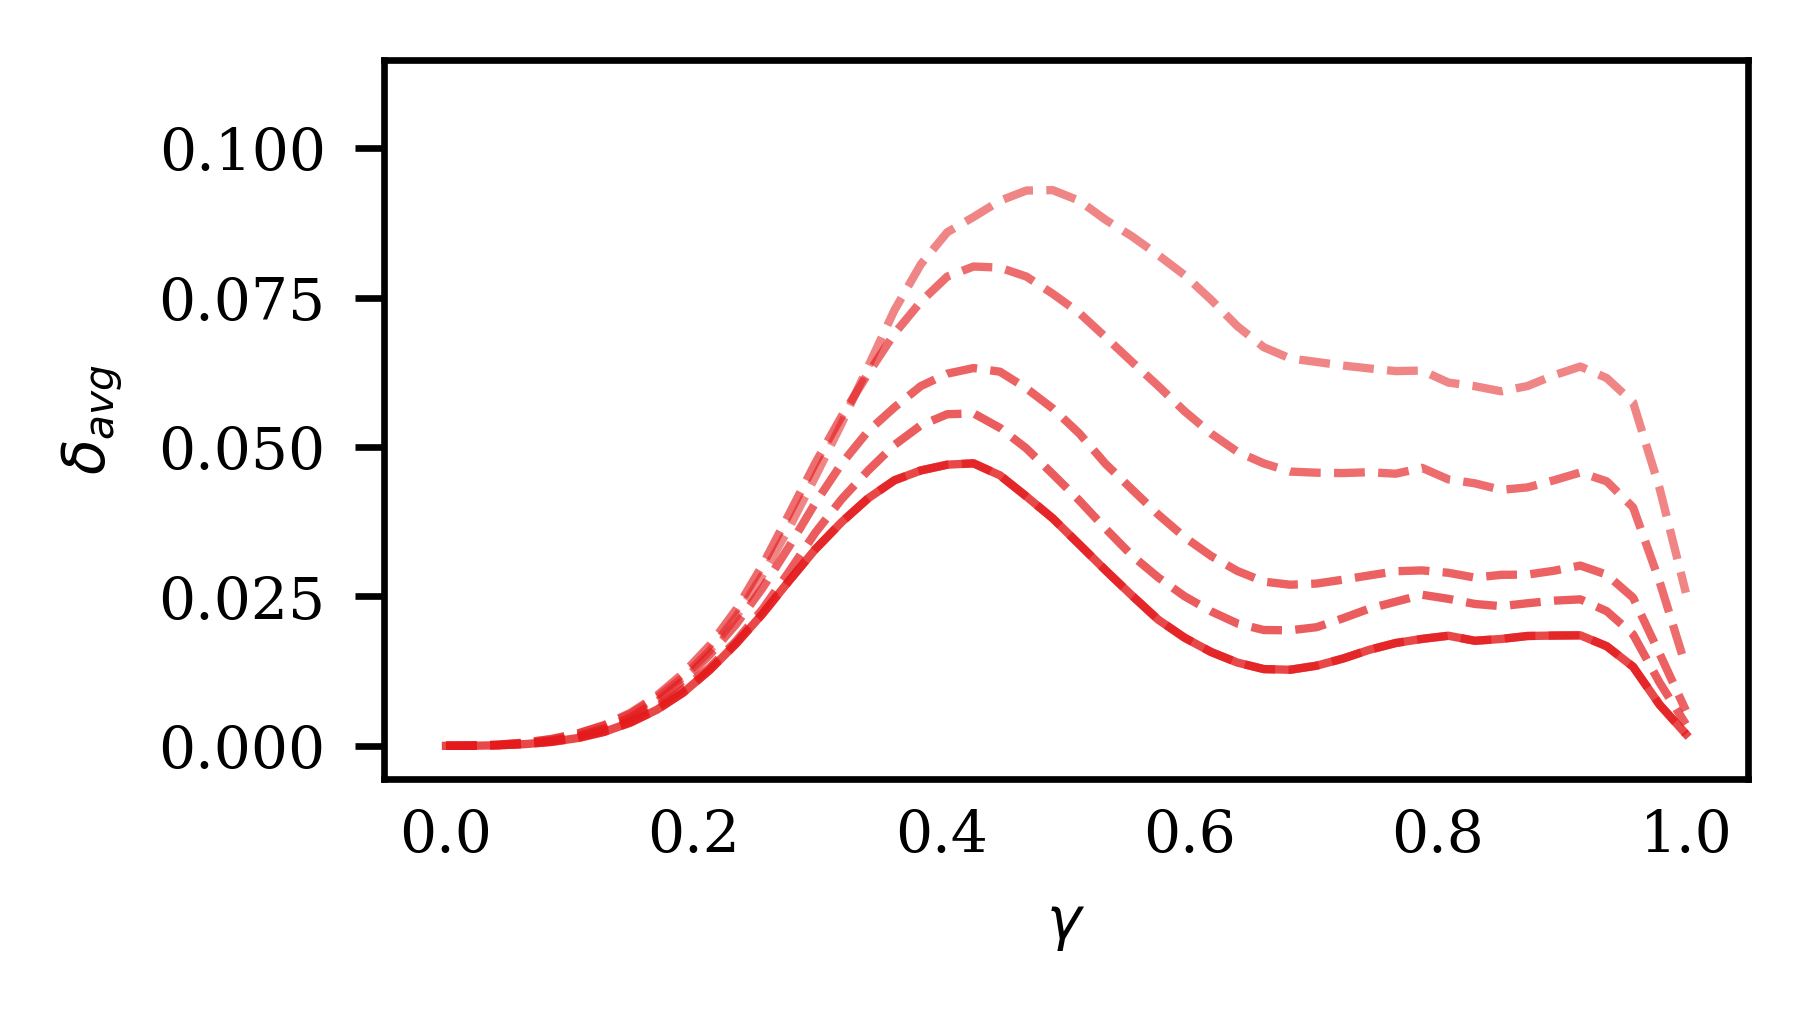

In [14]:
fig = plt.figure(figsize=(figure_size_x/2, figure_size_y/2.2))

for n in range(4,10):
    plt.plot(gamma_range, 
             np.mean(delta_quantum_arrays[n][:, 20:50], axis=1),
             '--',
             color=colors["red"],
             alpha=0.8-0.4/(n-3.5))

plt.plot(gamma_range, 
        np.mean(delta_quantum_arrays[9][:, 20:50], axis=1),
        '-',
        color=colors["red"],
        alpha=0.8)

# Set labels
plt.xlabel('$\gamma$')
plt.ylabel('$\delta_{avg}$')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

fig.savefig(projectdir+f'figures/peak_in_delta_vs_gamma_n4_9')